In [1]:
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np



Загрузка набора данных


In [ ]:
path = "/content/drive/MyDrive/datasets/machine_measurements.csv"

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(path)

<ipython-input-4-778e93251221>:1: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)



Код выполняет выборку случайных 5000 строк из данных и сохраняет результат data1



In [ ]:
data1 = data.sample(n = 5000, random_state= 42)

In [ ]:
print("data1 shape: ", data1.shape)
data1.head()

data1 shape:  (5000, 33)


,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
758324,19476374,43805018,6419971,2135-01-20 06:09:00,Sinus rhythm,rSr'(V1) - probable normal variant,NaN,Normal ECG,NaN,NaN,...,60 Hz notch Baseline filter,845,40,158,194,280,592,61,38,18
734655,19168490,45945321,6097533,2139-12-02 23:47:00,Sinus bradycardia,Extensive ST-T changes are nonspecific,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,1052,40,154,180,286,628,47,3,-25
360119,14500589,45852416,6919786,2169-01-20 09:35:00,A-V dissociation,Left axis deviation,Left bundle branch block,Lateral infarct - age undetermined,Possible inferior infarct - age undetermined,NaN,...,60 Hz notch Baseline filter,857,29999,29999,200,354,662,29999,-70,95
321281,14023296,41676651,6602038,2121-06-17 15:34:00,Sinus rhythm,NaN,Normal ECG,NaN,NaN,NaN,...,60 Hz notch Baseline filter,750,40,154,190,286,554,61,58,58
355530,14449203,40391737,6632385,2116-01-24 23:25:00,Sinus rhythm,"Low voltage, precordial leads",NaN,NaN,NaN,NaN,...,<not specified>,723,323,29999,504,600,915,35,-16,48


In [ ]:
from sklearn.preprocessing import LabelEncoder

Создания объекта LabelEncoder

In [ ]:
encoder = LabelEncoder()

Список текстовых столбцов

In [ ]:
text_columns = ['ecg_time','report_1', 'report_2', 'report_3','report_4', 'report_5', 'report_6', 'report_7', 'report_8', 'report_9', 'report_10',
                'report_11', 'report_12', 'report_13', 'report_14', 'report_15', 'report_16', 'report_17',
                'bandwidth', 'filtering']

Преобразование текстовых столбцов в числовые значения

In [ ]:
for col in text_columns:
    data1[col] = encoder.fit_transform(data1[col])


In [ ]:
data1.report_0

758324                                     Sinus rhythm
734655                                Sinus bradycardia
360119                                 A-V dissociation
321281                                     Sinus rhythm
355530                                     Sinus rhythm
                              ...                      
51025                            Sinus rhythm with PACs
695742                                    Atrial pacing
388463    Atrial flutter with slow ventricular response
333481                                Sinus bradycardia
455607                                     Sinus rhythm
Name: report_0, Length: 5000, dtype: object

In [ ]:
data1.describe()

,subject_id,study_id,cart_id,ecg_time,report_1,report_2,report_3,report_4,report_5,report_6,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,1.505220e+07,4.500240e+07,6.575942e+06,2499.132400,234.690000,230.26700,158.201000,126.97120,78.917200,33.782600,...,1.14940,874.794800,4654.753400,8375.932800,291.356400,402.367400,700.333400,4827.231000,124.498800,192.8008
std,2.898281e+06,2.877633e+06,2.642285e+05,1443.117337,94.888614,89.22355,92.135656,61.63838,28.296277,8.486727,...,0.39989,1318.041573,10764.894279,13338.688147,1265.991385,1394.087578,1380.973979,10998.278665,1797.048746,2170.7013
min,1.000188e+07,4.000014e+07,6.037973e+06,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,40.000000,50.000000,0.000000,41.000000,262.000000,-162.000000,-170.000000,-180.0000
25%,1.257552e+07,4.251057e+07,6.376932e+06,1249.750000,184.000000,186.00000,46.000000,100.00000,90.000000,36.000000,...,1.00000,681.000000,40.000000,144.000000,186.000000,276.000000,566.000000,36.000000,-13.000000,15.0000
50%,1.501363e+07,4.503074e+07,6.632385e+06,2499.500000,236.000000,223.50000,238.000000,163.00000,90.000000,36.000000,...,1.00000,810.000000,40.000000,158.000000,200.000000,300.000000,608.000000,56.000000,14.000000,42.0000
75%,1.758691e+07,4.745753e+07,6.784628e+06,3748.250000,345.000000,321.00000,238.000000,163.00000,90.000000,36.000000,...,1.00000,937.000000,318.000000,29999.000000,228.000000,342.000000,664.000000,72.000000,47.000000,67.0000
max,1.999473e+07,4.999968e+07,6.998078e+06,4998.000000,346.000000,321.00000,238.000000,163.00000,90.000000,36.000000,...,3.00000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,32767.000000,29999.000000,32767.0000


In [ ]:
print("data shape: ", data1.shape)
data1.head()

data shape:  (5000, 33)


,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
758324,19476374,43805018,6419971,1202,Sinus rhythm,345,321,154,163,90,...,1,845,40,158,194,280,592,61,38,18
734655,19168490,45945321,6097533,1500,Sinus bradycardia,101,321,46,163,90,...,1,1052,40,154,180,286,628,47,3,-25
360119,14500589,45852416,6919786,3268,A-V dissociation,191,189,132,117,90,...,1,857,29999,29999,200,354,662,29999,-70,95
321281,14023296,41676651,6602038,396,Sinus rhythm,346,215,238,163,90,...,1,750,40,154,190,286,554,61,58,58
355530,14449203,40391737,6632385,185,Sinus rhythm,204,321,238,163,90,...,2,723,323,29999,504,600,915,35,-16,48


In [ ]:
data1.loc[:,"report_0"] = data1["report_0"].astype(str)
class_values = sorted(data1["report_0"].unique())
class_idc = {name: id for id, name in enumerate(class_values)}

paper_idc = {name: idx for idx, name in enumerate(sorted(data1["study_id"].unique()))}
source_idc = {name: idx for idx, name in enumerate(sorted(data1["cart_id"].unique()))}
target_idc = {name: idx for idx, name in enumerate(sorted(data1["subject_id"].unique()))}
data1["report_0"] = data1["report_0"].apply(lambda value: class_idc[value])
data1["study_id"] = data1["study_id"].apply(lambda value: paper_idc[value])
data1["cart_id"] = data1["cart_id"].apply(lambda value: source_idc[value])
data1["subject_id"] = data1["subject_id"].apply(lambda value: target_idc[value])


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

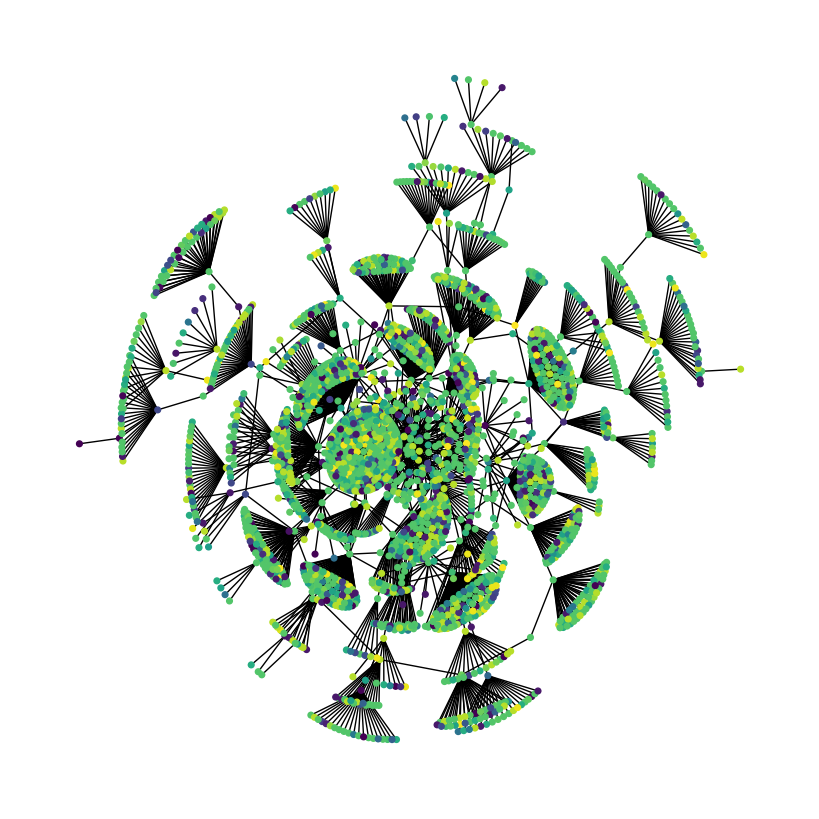

In [ ]:
plt.figure(figsize=(8, 8))
colors = data1["report_0"].tolist()
cora_graph = nx.from_pandas_edgelist(data1.sample(n=2500), source = "cart_id", target = "subject_id")
subjects = list(data1[data1["study_id"].isin(list(cora_graph.nodes))]["report_0"])
nx.draw_kamada_kawai(cora_graph, node_size=17, node_color=subjects)

In [ ]:
feature_names = set(data1.columns) - {"study_id", "report_0"}


In [ ]:
edges = data1[["cart_id", "subject_id"]].to_numpy().T
print("Edges shape:", edges.shape)

Edges shape: (2, 5000)


In [ ]:
edges

array([[  49,   10,  129, ...,   58,   10,   59],
       [4484, 4314, 2122, ..., 2301, 1975, 2672]])

In [ ]:
node_features = tf.cast(data1.sort_values("study_id")[list(feature_names)].to_numpy(), dtype=tf.float32)
print("Nodes shape:", node_features.shape)


Nodes shape: (5000, 31)


In [ ]:
edge_weights = tf.ones(shape=edges.shape[1])
print("Edges_weights shape:", edge_weights.shape)

Edges_weights shape: (5000,)


In [ ]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
         # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [ ]:
"""
### Implement a graph convolution layer

We implement a graph convolution module as a [Keras Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer?version=nightly).
Our `GraphConvLayer` performs the following steps:

1. **Prepare**: The input node representations are processed using a FFN to produce a *message*. You can simplify
the processing by only applying linear transformation to the representations.
2. **Aggregate**: The messages of the neighbours of each node are aggregated with
respect to the `edge_weights` using a *permutation invariant* pooling operation, such as *sum*, *mean*, and *max*,
to prepare a single aggregated message for each node. See, for example, [tf.math.unsorted_segment_sum](https://www.tensorflow.org/api_docs/python/tf/math/unsorted_segment_sum)
APIs used to aggregate neighbour messages.
3. **Update**: The `node_repesentations` and `aggregated_messages`—both of shape `[num_nodes, representation_dim]`—
are combined and processed to produce the new state of the node representations (node embeddings).
If `combination_type` is `gru`, the `node_repesentations` and `aggregated_messages` are stacked to create a sequence,
then processed by a GRU layer. Otherwise, the `node_repesentations` and `aggregated_messages` are added
or concatenated, then processed using a FFN.


The technique implemented use ideas from [Graph Convolutional Networks](https://arxiv.org/abs/1609.02907),
[GraphSage](https://arxiv.org/abs/1706.02216), [Graph Isomorphism Network](https://arxiv.org/abs/1810.00826),
[Simple Graph Networks](https://arxiv.org/abs/1902.07153), and
[Gated Graph Sequence Neural Networks](https://arxiv.org/abs/1511.05493).
Two other key techniques that are not covered are [Graph Attention Networks](https://arxiv.org/abs/1710.10903)
and [Message Passing Neural Networks](https://arxiv.org/abs/1704.01212).
"""
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")
        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [ ]:
graph_info = (node_features, edges, edge_weights)

In [ ]:
num_classes = len(class_idc)

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
hidden_units = [64, 64]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)
#gnn_model.summary()

In [ ]:
train_data, test_data = [], []

for _, group_data in data1.groupby("report_0"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (2525, 33)
Test data shape: (2475, 33)


In [ ]:
x_train = train_data.study_id.to_numpy()
y_train = train_data["report_0"]

In [ ]:
x_test = test_data.study_id.to_numpy()
y_test = test_data["report_0"]

In [ ]:
def run_experiment(model, x_train, y_train, x_test, y_test):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=100, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2525,)
(2525,)
(2475,)
(2475,)


In [ ]:
history = run_experiment(gnn_model, x_train, y_train, x_test, y_test)

Epoch 1/300
9/9 [==============================] - 12s 274ms/step - loss: 4.6775 - acc: 0.2535 - val_loss: 5.2505 - val_acc: 0.0211
Epoch 2/300
9/9 [==============================] - 2s 219ms/step - loss: 3.3161 - acc: 0.3975 - val_loss: 4.9528 - val_acc: 0.0290
Epoch 3/300
9/9 [==============================] - 3s 306ms/step - loss: 3.1249 - acc: 0.4199 - val_loss: 4.9218 - val_acc: 0.0686
Epoch 4/300
9/9 [==============================] - 3s 287ms/step - loss: 2.9996 - acc: 0.4315 - val_loss: 5.1110 - val_acc: 0.1873
Epoch 5/300
9/9 [==============================] - 2s 185ms/step - loss: 2.9365 - acc: 0.4320 - val_loss: 4.5975 - val_acc: 0.2744
Epoch 6/300
9/9 [==============================] - 2s 191ms/step - loss: 2.8641 - acc: 0.4320 - val_loss: 3.9138 - val_acc: 0.4776
Epoch 7/300
9/9 [==============================] - 2s 180ms/step - loss: 2.8501 - acc: 0.4315 - val_loss: 3.5858 - val_acc: 0.4802
Epoch 8/300
9/9 [==============================] - 2s 191ms/step - loss: 2.7942 - 

Text(0, 0.5, 'Loss')

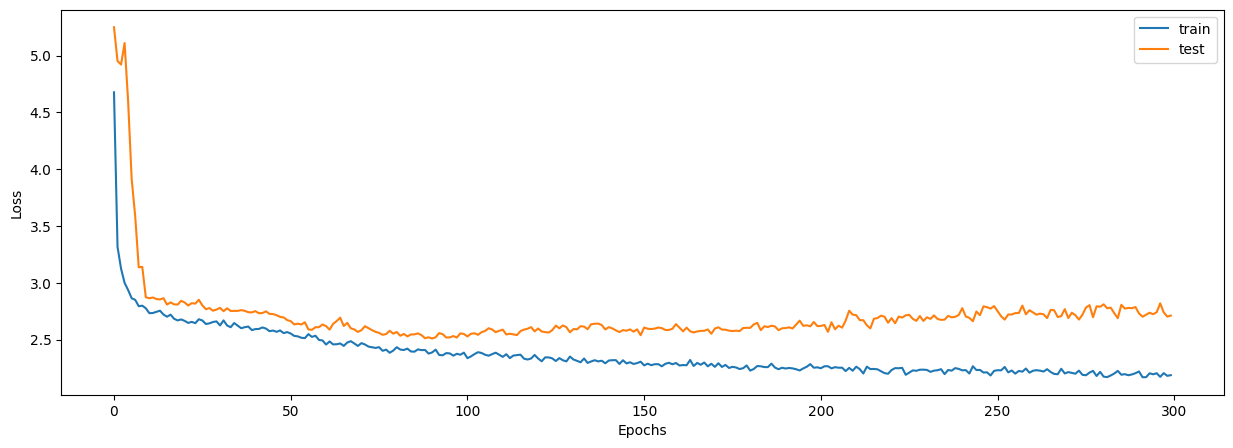

In [ ]:

fig, ax1 = plt.subplots(1, figsize=(15, 5))

ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "test"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

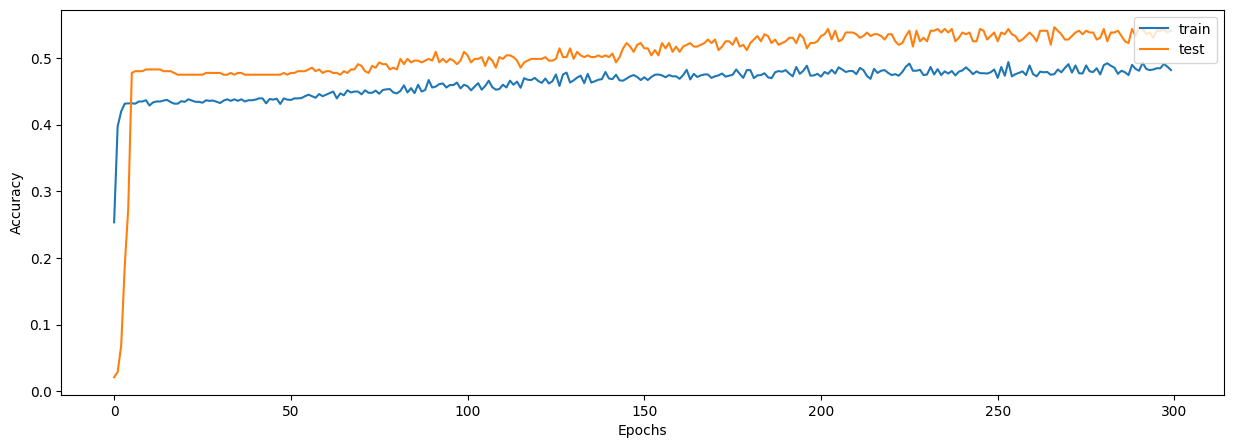

In [ ]:
fig, ax2 = plt.subplots(1, figsize=(15, 5))
ax2.plot(history.history["acc"])
ax2.plot(history.history["val_acc"])
ax2.legend(["train", "test"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
plt.show()